In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram
sim = Aer.get_backend('aer_simulator')

In [2]:
qc_output = QuantumCircuit(8) # create quantum circuit with 8 qubits
qc_output.measure_all()
qc_output.draw(initial_state=True)

░ ┌─┐                     
  q_0: |0>─░─┤M├─────────────────────
           ░ └╥┘┌─┐                  
  q_1: |0>─░──╫─┤M├──────────────────
           ░  ║ └╥┘┌─┐               
  q_2: |0>─░──╫──╫─┤M├───────────────
           ░  ║  ║ └╥┘┌─┐            
  q_3: |0>─░──╫──╫──╫─┤M├────────────
           ░  ║  ║  ║ └╥┘┌─┐         
  q_4: |0>─░──╫──╫──╫──╫─┤M├─────────
           ░  ║  ║  ║  ║ └╥┘┌─┐      
  q_5: |0>─░──╫──╫──╫──╫──╫─┤M├──────
           ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
  q_6: |0>─░──╫──╫──╫──╫──╫──╫─┤M├───
           ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
  q_7: |0>─░──╫──╫──╫──╫──╫──╫──╫─┤M├
           ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 0 8/════╩══╩══╩══╩══╩══╩══╩══╩═
              0  1  2  3  4  5  6  7

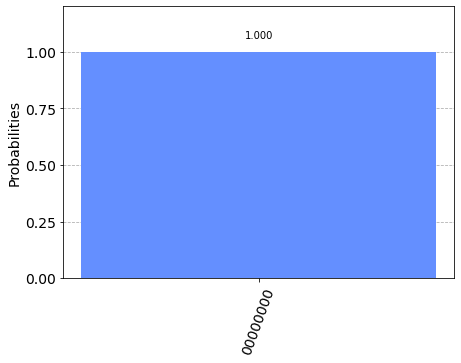

In [3]:
result = sim.run(qc_output).result()
counts = result.get_counts()
plot_histogram(counts)

## Example: Creating an Adder Circuit

### CNOT Gate

In [4]:
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.cx(0, 1)
# qc.measure(0, 0)
# qc.measure(1, 1)
qc.draw()

┌───┐     
q_0: ┤ X ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
c: 2/══════════

### Half Adder

In [5]:
# qubits 0 and 1
qc_ha = QuantumCircuit(4, 2)
qc_ha.x(0)
qc_ha.x(1)
qc_ha.barrier()

# cnots for XOR
qc_ha.cx(0, 2)
qc_ha.cx(1, 2)
qc_ha.barrier()

# ccx for AND
qc_ha.ccx(0, 1, 3)
qc_ha.barrier()

# extract results
qc_ha.measure(2, 0)
qc_ha.measure(3, 1)

qc_ha.draw()

┌───┐ ░            ░       ░       
q_0: ┤ X ├─░───■────────░───■───░───────
     ├───┤ ░   │        ░   │   ░       
q_1: ┤ X ├─░───┼────■───░───■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐ ░   │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├─░───┼───░─┤M├───
           ░ └───┘└───┘ ░ ┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░────────────░─┤ X ├─░──╫─┤M├
           ░            ░ └───┘ ░  ║ └╥┘
c: 2/══════════════════════════════╩══╩═
                                   0  1

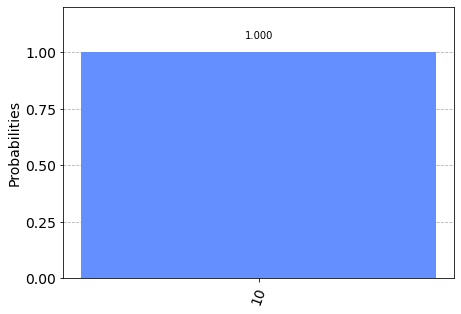

In [6]:
# simulation
qobj = assemble(qc_ha)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)